<a href="https://colab.research.google.com/github/sharon-kurant/backprop_from_scratch/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Course: Assignment #1 

Submitted by:

 **Student 1 Name+ID

 **Student 2 Name+ID

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be written in Python 3.7+

· You are allowed to use only Pytorch, numpy and matplotlib as external libraries

· The code must be reasonably documented

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).


In [1]:
%matplotlib inline

## Question 1:  Multidimentional XOR and backpropagation


Given $ d $ bits $b=(b_1, b_2, ... , b_d) \in \{0, 1\}^d$, we define $$XOR(b) = Σ_{i=1}^db_i\ mod\ 2$$

You will train a feedforward neural network to model the multidimentional XOR problem.

The following function returns the labeled XOR "dataset" for any given $d$ (`dim`)

In [2]:
import itertools

def XORData(dim):
  X = np.array(list(itertools.product([0, 1], repeat=dim)))
  Y = X.sum(axis=1)%2
  return X, Y

Implement the following:

1. A linear layer class:`Linear(torch.nn.Module)`\
• You shold inherit from `torch.nn.Module`\
• You can not use `torch.nn.LinearLayer` or any other model implemented by PyTorch, only tensors. Wrap every tensor object with `torch.nn.Parameter` (for the optimizer).\
• Use `torch.randn` to initialize the parameter tensors (weights matrix and biases vector)\
• Implement the `forward` method according to the linear model $y = Wx + b$\
• The number of parameters should be defined by `in_features` and `out_features` \
• Make sure to enable gradient computation!

In [3]:
import torch
import torch.nn as nn

class Linear(nn.Module):
  def __init__(self, in_features, out_features):
    # Implement here
    super(Linear, self).__init__()
    self.weights = nn.Parameter(torch.randn(in_features, out_features))
    self.bias = nn.Parameter(torch.randn(out_features))
  def forward(self, x):
    # Implement here
    x = torch.matmul(x, self.weights) + self.bias
    return x

In [4]:
l = Linear(3, 2)
l.forward(torch.Tensor([1,2,3]))

tensor([-0.3869,  7.7957], grad_fn=<AddBackward0>)

2. A feedforward neural network:`FFNet(torch.nn.module)`\
• Use the `Linear` class you implemented to construct a network with `in_features` input size, `out_features` output size, and one hidden layer with `hidden_size` neurons.\
• Use the sigmoid activation function on top of the hidden layer neurons.\
• The XOR example we saw in class should help you.

In [5]:
class FFNet(nn.Module):
  def __init__(self, in_features, out_features, hidden_size):
    # Implement here
    super(FFNet, self).__init__()
    self.input_layer = Linear(in_features, hidden_size)
    self.hidden_layer = Linear(hidden_size, out_features)
  def forward(self, x):
    # Implement here
    x = self.input_layer.forward(x)
    x = torch.sigmoid(x)
    x = self.hidden_layer.forward(x)
    return x

In [6]:
net = FFNet(3,5,2)
net.forward(torch.Tensor([1,100,20]))

tensor([-2.3811,  0.2928,  2.3253, -0.9274, -0.7379], grad_fn=<AddBackward0>)

### Exploring the hidden layer
In class we talked about the **Universal Approximation Theorem**. The following question will help us to understand how hard is finding the optimal weight that the theorem talks about.

You are given a basic training function.

In [7]:
import numpy as np
import torch.optim as optim

loss_func = nn.MSELoss()

def train(net, X, Y, epochs=3000):
  steps = X.shape[0]
  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint((X.shape[0]))
          x_var = torch.Tensor(X[data_point])
          y_var = torch.Tensor([Y[data_point]])        
          optimizer.zero_grad()
          y_hat = net(x_var)
          loss = loss_func(y_hat, y_var)
          loss.backward()
          optimizer.step()
      if(i % 100 == 0):
          print("Epoch:{}, Loss:{}".format(i, loss.detach()))

Using the above, for each of the dimentions: $d = 2, 3, 4, 5$:
1. Create the corresponding dataset using `XORData`
2. Create models with different hidden layer sizes($1, 2, 3, ..., d,d+const, const*d,...$ etc.) and an optimizer for it using: `optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
`
3. Try to train the different networks on the dataset.

Make sure to create a new `FFNet` and optimizer objects each time you call `train`.


In [8]:
# Implement here
constant = 3

for d in range(2,6):

  print(f"\nFFNet dimension: input: {d}, hidden layer: {d}, output: 2")
  X, Y = XORData(d)
  model = FFNet(d, 1, d)
  optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
  train(model, X, Y, epochs = 1000)
  print("")


FFNet dimension: input: 2, hidden layer: 2, output: 2
Epoch:0, Loss:0.01935473456978798
Epoch:100, Loss:0.10451086610555649
Epoch:200, Loss:0.002070530317723751
Epoch:300, Loss:0.15102773904800415
Epoch:400, Loss:0.22874027490615845
Epoch:500, Loss:0.0009426436154171824
Epoch:600, Loss:0.04238468036055565
Epoch:700, Loss:0.018090128898620605
Epoch:800, Loss:0.0014263277407735586
Epoch:900, Loss:0.0013773755636066198


FFNet dimension: input: 3, hidden layer: 3, output: 2
Epoch:0, Loss:0.3013974130153656
Epoch:100, Loss:0.19434787333011627
Epoch:200, Loss:0.10927517712116241
Epoch:300, Loss:0.22007784247398376
Epoch:400, Loss:0.030227230861783028
Epoch:500, Loss:0.3278599977493286
Epoch:600, Loss:1.109175205230713
Epoch:700, Loss:0.4137619733810425
Epoch:800, Loss:0.02425495535135269
Epoch:900, Loss:0.03412343189120293


FFNet dimension: input: 4, hidden layer: 4, output: 2
Epoch:0, Loss:0.5370469689369202
Epoch:100, Loss:0.5822028517723083
Epoch:200, Loss:0.09914544224739075
Epoch:300

For which dimensions you were able to reach a model that converges (loss value is geting close to 0)?\
What is the number of hidden neurons in that network and how did you find it?\
What results did you expect and how does it differ from the results you achieved?


**Answers:**


### Backpropagation

The following part will focus on the computaion of gradients w.r.t the model parameters, to understand what is happening behind `loss.backward()`.

Implement the function:`calc_gradients(net, x, loss)`:

Input: instance of `FFNet` with a hidden layer of size 2, input of size 2 and output of size 1, input vector `x` and `loss` value.

Output: One dimensional tensor with the gradients of the loss w.r.t each of the parameters, ordered as the corresponding parameters order `net.parameters()` returns (if we would flatten it's output). 

1. Comute(by hand) the derivatives w.r.t the second linear layer parameters
2. Use the chain rule to comute(by hand) the derivatives w.r.t the first linear layer parameters
3. Implement the final form computations per parameter.
4. Order the gradients as described above

Practical number 4 slides 26-28 should be helpful.

In [9]:
def calc_gradients(net, x, y_hat, y_var, loss):
  
  w1_1, w1_2, w1_3, w1_4 = net.input_layer.weights.flatten()
  b1_1, b1_2 = net.input_layer.bias.flatten()

  w2_1, w2_2 = net.hidden_layer.weights.flatten()
  
  z1 = torch.sigmoid(w1_1 * x[0] + w1_3 * x[1] +b1_1)
  z2 = torch.sigmoid(w1_2 * x[0] + w1_4 * x[1] +b1_2)

  # z = torch.sigmoid(torch.matmul(w, torch.t(x))+torch.t(b))

  L_d = 2 * (y_hat - y_var)
  z1_d = z1 * (1-z1)
  z2_d = z2 * (1-z2)

  dL_w2_1 = L_d * z1
  dL_w2_2 = L_d * z2

  dL_w1_1 = L_d * w2_1 * z1_d * x[0]
  dL_w1_2 = L_d * w2_2 * z2_d * x[0]

  dL_w1_3 = L_d * w2_1 * z1_d * x[1]
  dL_w1_4 = L_d * w2_2 * z2_d * x[1]

  dL_b1_1 = L_d * w2_1 * z1_d
  dL_b1_2 = L_d * w2_2 * z2_d

  dL_b2 = L_d

  return torch.tensor([dL_w1_1, dL_w1_2, dL_w1_3, dL_w1_4, dL_b1_1, dL_b1_2, dL_w2_1, dL_w2_2, dL_b2])

Run the following cell to check the correctness of your computation:

In [10]:
def equal_gradients(net, x, y_hat, y_var, loss):
  grads = []
  for param in net.parameters():
    grads.append(param.grad.view(-1))
  grads = torch.cat(grads)
  return True if torch.sum(grads.round(decimals = 4) - calc_gradients(net, x, y_hat, y_var, loss).round(decimals = 4)) == 0 else False

def train_and_compare(net, X, Y, epochs=100):
  steps = X.shape[0]
  for i in range(epochs):
      for j in range(steps):
          data_point = np.random.randint(X.shape[0])
          x_var = torch.Tensor(X[data_point])
          y_var = torch.Tensor([Y[data_point]])        
          optimizer.zero_grad()
          y_hat = net(x_var)
          loss = loss_func(y_hat, y_var)
          loss.backward()
          if not equal_gradients(net, x_var, y_hat, y_var, loss.item()):
            print("Wrong gradients computation!")
            return
          optimizer.step()
  print("Correct gradients computation!")

model = FFNet(2, 1, 2)
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
X, Y = XORData(2)


train_and_compare(model, X, Y)

Correct gradients computation!


### Question 2: Solving Fashion-MNIST

In class we've learned about MNIST data set, which can be loaded from torchvision.datasets.
We built a feedforward network for MNIST classification with accuracy of ~96%.
In this assignment we will use Fashion-MNIST, which is also a built-in dataset in Pytorch. We'll
try different networks and find which one fits better.

The code must run on GPU.

In [11]:
import torch
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt

# Use .to(device) when needed to train on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Add any additional functions here

Please implement the following modules and functions:
1. Function 1: `load_dataset()`\
Load the Fashion-MNIST training and test set from Pytorch. Split the training set to
training and validation set (80%-20% ratio). Define a DataLoader for each set. In the
DataLoader parameters use "batch_size"=64.


In [35]:
### Implement here
def load_dataset(p = 0.2):
  normalize = transforms.Normalize((0.2859,), (0.3530,))
  totensor = transforms.ToTensor()
  mnist_transforms = transforms.Compose([totensor, normalize])

  mnist_trainset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=mnist_transforms)
  mnist_testset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=mnist_transforms)

  indices = list(range(len(mnist_trainset))) # 60K
  np.random.shuffle(indices)

  split = int(np.floor(p * len(mnist_trainset))) # 12K
  train_sample = SubsetRandomSampler(indices[split:])
  val_sample = SubsetRandomSampler(indices[:split])
  
  train_loader = torch.utils.data.DataLoader(mnist_trainset, sampler = train_sample, batch_size=64)
  val_loader = torch.utils.data.DataLoader(mnist_trainset, sampler = val_sample, batch_size=64)
  test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)

  k_choices = int(np.floor(len(indices[split:])*0.1)) # 4.8K
  train_sample_small = SubsetRandomSampler(np.random.choice(indices[split:],size=k_choices))
  train_loader_small = torch.utils.data.DataLoader(mnist_trainset, sampler = train_sample_small, batch_size=64)

  print('train set len', len(train_loader.sampler.indices))
  print('validation set len', len(val_loader.sampler.indices))
  print('test set len', len(test_loader.dataset))
  print('train_small set len', len(train_loader_small.sampler.indices))


  # SAVE TO CURRENT WORKING DIR!!!!!!!!!!!!!!!!!!!!
  loaders = {'train_loader': train_loader,
              'val_loader': val_loader,
              'test_loader': test_loader,
              'train_loader_small': train_loader_small}
  torch.save(loaders, '/data/loaders')

In [36]:
load_dataset()

train set len 48000
validation set len 12000
test set len 10000
train_small set len 4800


In [16]:
n_features = 28*28
n_classes = 10

class GenericFeedForwardNet(nn.Module):

  activation_func_map = {'relu': nn.ReLU, 'tanh': nn.Tanh, 'sigmoid': nn.Sigmoid}

  def __init__(self, n_features, n_hidden_units_per_layer, n_outputs, activation_func):
    super().__init__()

    if isinstance(n_hidden_units_per_layer, list):
      dim_list = [n_features, *n_hidden_units_per_layer, n_outputs]
    else:
      dim_list = [n_features, n_hidden_units_per_layer, n_outputs]

    layers = []
    for in_dim, out_dim in zip(dim_list[:-1], dim_list[1:]):
      layers += [
          nn.Linear(in_dim, out_dim)
      ]
      if activation_func in GenericFeedForwardNet.activation_func_map.keys():
        layers += [
            GenericFeedForwardNet.activation_func_map[activation_func]()
        ]
        
    self.fc = nn.Sequential(*layers[:-1])
    self.log_softmax = nn.LogSoftmax(dim = 1)
    
  def forward(self, x):
    h = self.fc(x)
    y_pred = self.log_softmax(h)
    return y_pred

In [17]:
model = GenericFeedForwardNet(n_features, [32,64,128], n_classes, 'tanh')
print(model)

GenericFeedForwardNet(
  (fc): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=10, bias=True)
  )
  (log_softmax): LogSoftmax(dim=1)
)


In [18]:
def plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies):
  plt.plot(train_losses)
  plt.plot(val_losses)
  plt.grid()
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'])
  plt.show()

  print('')
  
  plt.plot(train_accuracies)
  plt.plot(val_accuracies)
  plt.grid()
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'])
  plt.show()

In [37]:
def train_model(model, optimizer, loss_func, train_loader):
  train_loss = 0.0
  train_accuracy = 0.0

  for data, labels in train_loader:
    # Transfer Data to GPU if available
    data = data.view(-1,28*28)

    if torch.cuda.is_available():
        data, labels = data.cuda(), labels.cuda()
    
    # Clear the gradients
    optimizer.zero_grad()
    # Forward Pass
    predictions = model(data)
    # Find the Loss
    loss = loss_func(predictions,labels)
    # Calculate gradients
    loss.backward()
    # Update Weights
    optimizer.step()
    # Calculate Loss
    train_loss += loss.item()
    train_accuracy += torch.sum(labels == predictions.argmax(axis=1)).item()

  train_accuracy = train_accuracy/len(train_loader.sampler.indices)
  train_loss = train_loss / len(train_loader)

  return train_loss, train_accuracy

In [38]:
def val_model(model, loss_func, val_loader):
  val_loss = 0.0
  val_accuracy = 0.0
  model.eval()     # Optional when not using Model Specific layer
  for data, labels in val_loader:

    data = data.view(-1,28*28)
    # Transfer Data to GPU if available
    
    if torch.cuda.is_available():
        data, labels = data.cuda(), labels.cuda()
    
    # Forward Pass
    predictions = model(data)
    # Find the Loss
    loss = loss_func(predictions,labels)
    # Calculate Loss
    val_loss += loss.item()
    val_accuracy += torch.sum(labels == predictions.argmax(axis=1)).item()

  val_accuracy = val_accuracy/len(val_loader.sampler.indices)
  val_loss = val_loss / len(val_loader)

  return val_loss, val_accuracy

In [39]:
import time

In [52]:
def test(model):
  n_correct = 0
  n_total = 0

  test_loader = torch.load('/data/loaders')['test_loader']

  for j, (data, labels) in enumerate(test_loader):

    if torch.cuda.is_available():
          data, labels = data.cuda(), labels.cuda()
    
    data = data.view(-1, n_features)

    y_hat = model(data)

    predictions = torch.argmax(y_hat, dim=1)

    n_correct += torch.sum(predictions==labels).type(torch.float32)
    n_total+= data.shape[0]
  
  acc = (n_correct/n_total).item()
  return acc

In [85]:
def train_val(model, epochs, optimizer, loss_func, lr_scheduler = None, small_train=False, early_stopping = False, patience = None):
  if torch.cuda.is_available():
    model = model.cuda()

  ## Check small train flag
  if small_train:
    train_loader = torch.load('/data/loaders')['train_loader_small']
  else:
    train_loader = torch.load('/data/loaders')['train_loader']
  
  val_loader = torch.load('/data/loaders')['val_loader']

  train_losses = []
  val_losses = []
  train_accuracies = []
  val_accuracies = []

  models = [] 

  ## Utility variable used for early stopping
  best_val_loss = np.Inf
  triggers = 0 

  # min_loss = np.Inf
  for e in range(epochs):
    
    train_loss, train_accuracy = train_model(model, optimizer, loss_func, train_loader)

    val_loss, val_accuracy = val_model(model, loss_func, val_loader)

    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss)

    # If early stopping flag is true
    if early_stopping:
      
      if best_val_loss>val_loss:
        best_val_loss = val_loss
        checkpoint = {'epoch': e,
                      'model_state_dict': model.state_dict(),
                      'optimizer_state_dict': optimizer.state_dict(),
                      'loss': best_val_loss,
                      }
        torch.save(checkpoint, '\data\early_stopping_model')
        print('triggers reset')
        triggers = 0
      
      else:
        triggers+=1
        print(f'triggers is {triggers}')
        if patience == triggers:
          print(f'model lost its patience!')
          checkpoint = torch.load('\data\early_stopping_model')
          model.load_state_dict(checkpoint['model_state_dict'])
          optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
          epoch = checkpoint['epoch']
          loss = checkpoint['loss']
          return model, train_losses,val_losses,train_accuracies,val_accuracies

    if lr_scheduler:
      lr_scheduler.step()

    print(f'Epoch {e+1} \n\t|\t Training Loss: {train_losses[e]} \t|\t Validation Loss: {val_losses[e]} \n\t|\t Training Acc: {train_accuracies[e]} \t|\t Validation Acc: {val_accuracies[e]}')

  return model, train_losses,val_losses,train_accuracies,val_accuracies
  
  #if (plot):
  #  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies)
  
  
  #test(model, test_loader)

In [ ]:
torch.save({
            'epoch': e,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_val_loss,
            }, '\data\early_stopping_model')

2. Function 2: `one_hidden_layer_no_activation(number_of_neurons)`\
For this function, you should implement the following steps:\
• Define the model: feed-forward network with one hidden layer, no activation
functions are applied on the hidden layer (linear). The number of neurons in the
hidden layer is given by the parameter “number_of_neurons”. The output layer
activation function is log softmax (recall what should be the dim of the output
layer as we learned in class).\
• Train the network on the Fashion-MNIST training set for 50 epochs\
• Use [cross entropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) as a cost function\
• Use the optimizer:\
learning_rate = 0.01\
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

Epoch 1 
	|	 Training Loss: 0.6505553713639577 	|	 Validation Loss: 0.5101493157921954 
	|	 Training Acc: 0.7863125 	|	 Validation Acc: 0.8271666666666667
Epoch 2 
	|	 Training Loss: 0.4941622625986735 	|	 Validation Loss: 0.475013053163569 
	|	 Training Acc: 0.8295625 	|	 Validation Acc: 0.83475
Epoch 3 
	|	 Training Loss: 0.46583659797906873 	|	 Validation Loss: 0.4670387939252752 
	|	 Training Acc: 0.8399583333333334 	|	 Validation Acc: 0.8395
Epoch 4 
	|	 Training Loss: 0.45059229381879173 	|	 Validation Loss: 0.44910866212337575 
	|	 Training Acc: 0.8458125 	|	 Validation Acc: 0.8409166666666666
Epoch 5 
	|	 Training Loss: 0.44038057388861973 	|	 Validation Loss: 0.44544963784357333 
	|	 Training Acc: 0.8481666666666666 	|	 Validation Acc: 0.8449166666666666
Epoch 6 
	|	 Training Loss: 0.4322250169912974 	|	 Validation Loss: 0.4409998591910017 
	|	 Training Acc: 0.8521875 	|	 Validation Acc: 0.8475833333333334
Epoch 7 
	|	 Training Loss: 0.4266670181353887 	|	 Validation Loss: 0.4

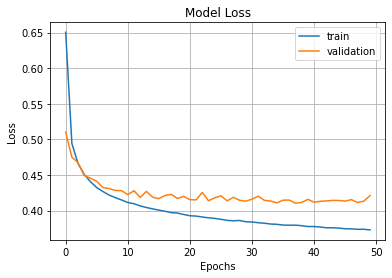

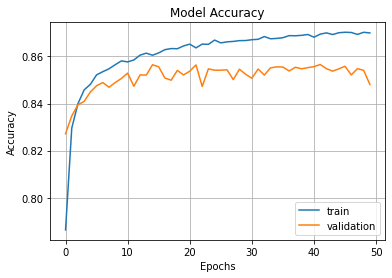

0.8374999761581421


In [88]:
def one_hidden_layer_no_activation(number_of_neurons):

  epochs = 50

  model = GenericFeedForwardNet(n_features, number_of_neurons, n_classes, "None")
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.01
  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

  model, train_losses,val_losses,train_accuracies,val_accuracies = train_val(model, epochs, optimizer, loss_fn)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies)
  test_acc = test(model)
  print("Test accuracy:",test_acc)  
  # letsgo(model, optimizer, loss_fn, train_loader, val_loader, test_loader, 3)
one_hidden_layer_no_activation(32)

3. Function 3: `two_hidden_layers_sigmoid(number_of_neurons)`\
• Same as Function 2, with 2 hidden layers\
• Use sigmoid as activation function\
• Train for 20 epochs with lr = 0.1\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


Epoch 1 
	|	 Training Loss: 1.5382804151376088 	|	 Validation Loss: 1.0015298055207476 
	|	 Training Acc: 0.4710416666666667 	|	 Validation Acc: 0.6793333333333333
Epoch 2 
	|	 Training Loss: 0.8016776694456736 	|	 Validation Loss: 0.6553638607580611 
	|	 Training Acc: 0.7166458333333333 	|	 Validation Acc: 0.7601666666666667
Epoch 3 
	|	 Training Loss: 0.6017216968139013 	|	 Validation Loss: 0.5449240672144484 
	|	 Training Acc: 0.7773333333333333 	|	 Validation Acc: 0.8061666666666667
Epoch 4 
	|	 Training Loss: 0.5122037216822306 	|	 Validation Loss: 0.48758591806634943 
	|	 Training Acc: 0.8208958333333334 	|	 Validation Acc: 0.8293333333333334
Epoch 5 
	|	 Training Loss: 0.4606812689900398 	|	 Validation Loss: 0.44737201675455623 
	|	 Training Acc: 0.8401041666666667 	|	 Validation Acc: 0.844
Epoch 6 
	|	 Training Loss: 0.4270485291481018 	|	 Validation Loss: 0.4301655249709779 
	|	 Training Acc: 0.8515 	|	 Validation Acc: 0.84525
Epoch 7 
	|	 Training Loss: 0.4038288641969363 	|	

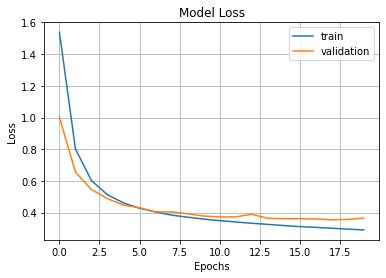

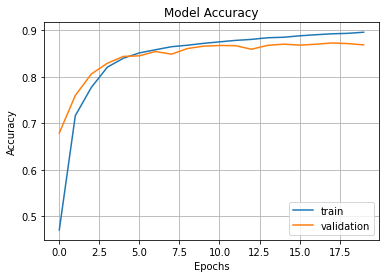

Test accuracy: 0.8585000038146973


In [89]:
def two_hidden_layers_sigmoid(number_of_neurons):
  
  epochs = 20

  model = GenericFeedForwardNet(n_features, [number_of_neurons]*2, n_classes, 'sigmoid')

  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.1

  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

  model, train_losses,val_losses,train_accuracies,val_accuracies = train_val(model, epochs, optimizer, loss_fn)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies)
  test_acc = test(model)
  print("Test accuracy:",test_acc)  

two_hidden_layers_sigmoid(32)

4. Function 4: `two_hidden_layers_relu(number_of_neurons)`\
• Same as Function 2, with 2 hidden layers\
• Use relu as activation function\
• Train for 20 epochs\
• Train the network with different learning rates, plot a figure with the validation
accuracy for each learning rate you tried\
• Use the learning rate that yields the best accuracy on the validation set and
report the accuracy on the test set\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

In [ ]:
def two_hidden_layers_relu(number_of_neurons):
  
  epochs = 20
  # placeholder for best model
  best_model = GenericFeedForwardNet(n_features, [number_of_neurons, number_of_neurons], n_classes, 'relu')
  max_val_acc = -np.Inf
  best_model_metrics = []
  best_lr = 0

  for learning_rate in [0.1, 0.01, 0.001]:
    
    model = GenericFeedForwardNet(n_features, [number_of_neurons, number_of_neurons], n_classes, 'relu')
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
    print(f"Loss & Accuracy for learning rate {learning_rate}:")
    model, train_losses,val_losses,train_accuracies,val_accuracies = train_val(model, epochs, optimizer, loss_fn)
    
    if val_accuracies[-1] > max_val_acc:
      max_val_acc = val_accuracies[-1]
      best_model_metrics = [train_losses,val_losses,train_accuracies,val_accuracies]
      best_model = model
      best_lr = learning_rate

  print(f"Model performed best with {best_lr} learning rate:")
  plot_train_val(*best_model_metrics)
  test_acc = test(best_model)
  print("Test accuracy:",test_acc)  

two_hidden_layers_relu(4)

Loss & Accuracy for learning rate 0.1:
Epoch 1 
	|	 Training Loss: 1.0004980887969335 	|	 Validation Loss: 0.7666763043467034 
	|	 Training Acc: 0.6217916666666666 	|	 Validation Acc: 0.7390833333333333
Epoch 2 
	|	 Training Loss: 0.7389482859770456 	|	 Validation Loss: 0.6744859587955983 
	|	 Training Acc: 0.7399583333333334 	|	 Validation Acc: 0.76375
Epoch 3 
	|	 Training Loss: 0.6750651799440384 	|	 Validation Loss: 0.6596616349638776 
	|	 Training Acc: 0.7647708333333333 	|	 Validation Acc: 0.7658333333333334
Epoch 4 
	|	 Training Loss: 0.6863660355408986 	|	 Validation Loss: 0.6335925876777223 
	|	 Training Acc: 0.7625 	|	 Validation Acc: 0.77925
Epoch 5 
	|	 Training Loss: 0.6353077554305394 	|	 Validation Loss: 0.5985409320986017 
	|	 Training Acc: 0.7787708333333333 	|	 Validation Acc: 0.7976666666666666
Epoch 6 
	|	 Training Loss: 0.630187060713768 	|	 Validation Loss: 0.6070600034708672 
	|	 Training Acc: 0.7828958333333333 	|	 Validation Acc: 0.79225
Epoch 7 
	|	 Training L

5. Function 5: `two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)`\
• Same as Function 4\
• Use lr = 0.01\
• Use decreasing learning rate\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model\


In [ ]:
### Implement here
def two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons):

  epochs = 20
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*2, n_classes, 'sigmoid')

  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.01

  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
  lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[e for e in range(epochs) if e%3==0], gamma=0.1)

  model, train_losses,val_losses,train_accuracies,val_accuracies = train_val(model, epochs, optimizer, loss_fn, lr_scheduler = lr_scheduler)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies)
  test_acc = test(model)
  print("Test accuracy:",test_acc)  

two_hidden_layers_relu_SGD_decreasing_lr(32)

6. Function 6: `two_hidden_layers_relu_adam(number_of_neurons)`\
• Same as Function 4\
• Use Adam as optimizer with lr=0.001\
• Train for 30 epochs\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
def two_hidden_layers_relu_adam(number_of_neurons):
  
  epochs = 30
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*2, n_classes, 'relu')

  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.001
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  model, train_losses,val_losses,train_accuracies,val_accuracies = train_val(model, epochs, optimizer, loss_fn)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies)
  test_acc = test(model)
  print("Test accuracy:",test_acc)  
  
two_hidden_layers_relu_adam(32)

7. Function 7: `four_hidden_layers_adam(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Train for 30 epochs\
• Use Adam as optimizer\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


In [ ]:
### Implement here
def four_hidden_layers_adam(number_of_neurons):
  epochs = 30
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*4, n_classes, 'relu')

  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.001
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  model, train_losses,val_losses,train_accuracies,val_accuracies = train_val(model, epochs, optimizer, loss_fn)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies)
  test_acc = test(model)
  print("Test accuracy:",test_acc)  
  
four_hidden_layers_adam(32)

8. Function 8: `four_hidden_layers_adam_weight_decay(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Use only 10% of the training set for training\
• Train for 250 epochs\
• Use Adam as optimizer with weight decay as regularization method\
• Plot a figure of the training and validation loss function during the training
process. Write in your report what's the difference between training with and
without weight decay? Based your answer on the plots.\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model


Epoch 1 
	|	 Training Loss: 1.4621326581637064 	|	 Validation Loss: 0.8004015547798035 
	|	 Training Acc: 0.49020833333333336 	|	 Validation Acc: 0.7006666666666667
Epoch 2 
	|	 Training Loss: 0.7170505404472352 	|	 Validation Loss: 0.6415217166885416 
	|	 Training Acc: 0.7216666666666667 	|	 Validation Acc: 0.7521666666666667
Epoch 3 
	|	 Training Loss: 0.6132639304796854 	|	 Validation Loss: 0.5791714966614195 
	|	 Training Acc: 0.7560416666666666 	|	 Validation Acc: 0.78
Epoch 4 
	|	 Training Loss: 0.5564978841940562 	|	 Validation Loss: 0.5599411928907354 
	|	 Training Acc: 0.7883333333333333 	|	 Validation Acc: 0.7950833333333334
Epoch 5 
	|	 Training Loss: 0.5084167357285817 	|	 Validation Loss: 0.5822668784159295 
	|	 Training Acc: 0.8129166666666666 	|	 Validation Acc: 0.7756666666666666


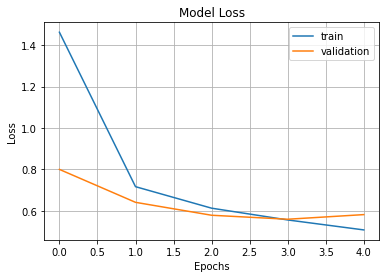

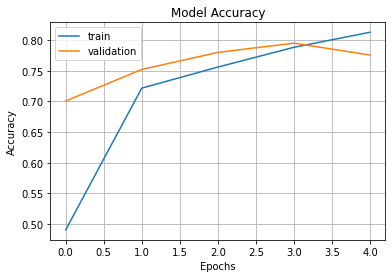

Test accuracy: 0.7594999670982361


In [70]:
### Implement here
def four_hidden_layers_adam_weight_decay(number_of_neurons):
  epochs = 250
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*4, n_classes, 'relu')

  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.001
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=0.001)

  model, train_losses,val_losses,train_accuracies,val_accuracies = train_val(model, epochs, optimizer, loss_fn, small_train=True)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies)
  test_acc = test(model)
  print("Test accuracy:",test_acc)  

four_hidden_layers_adam_weight_decay(32)

9. Function 9: `four_hidden_layers_adam_early_stopping(number_of_neurons)`\
• Same as Function 6, but use 4 hidden layers instead of 2\
• Use Adam as optimizer\
• Use only 10% of the training set for training\
• Train for 250 epochs\
• Use early stopping regularization (on the validation set) to prevent overfitting with
patience=20.\
• Plot a figure of the training and validation loss function during the training
process. Show on your figure the early stopping point.\
• Plot a figure with the accuracy on the training set and validation set for each
epoch\
• Plot the accuracy on the test set of the final model

triggers reset
Epoch 1 
	|	 Training Loss: 0.5752674615184467 	|	 Validation Loss: 0.47150906325971825 
	|	 Training Acc: 0.789125 	|	 Validation Acc: 0.8280833333333333
triggers reset
Epoch 2 
	|	 Training Loss: 0.44816699932018916 	|	 Validation Loss: 0.4433609868617768 
	|	 Training Acc: 0.8424166666666667 	|	 Validation Acc: 0.84425
triggers reset
Epoch 3 
	|	 Training Loss: 0.42856228989362716 	|	 Validation Loss: 0.43455584164946637 
	|	 Training Acc: 0.8505833333333334 	|	 Validation Acc: 0.84825
triggers reset
Epoch 4 
	|	 Training Loss: 0.4107958140174548 	|	 Validation Loss: 0.4182683380043253 
	|	 Training Acc: 0.8562291666666667 	|	 Validation Acc: 0.8529166666666667
triggers is 1
Epoch 5 
	|	 Training Loss: 0.39579807947079343 	|	 Validation Loss: 0.44571369173044856 
	|	 Training Acc: 0.8607708333333334 	|	 Validation Acc: 0.8498333333333333
triggers is 2
Epoch 6 
	|	 Training Loss: 0.398438759346803 	|	 Validation Loss: 0.4267079007435352 
	|	 Training Acc: 0.8598125 	|	

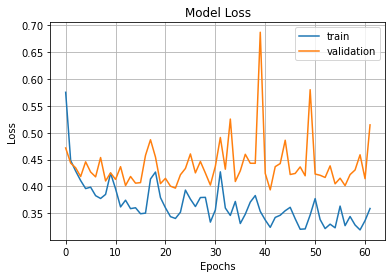

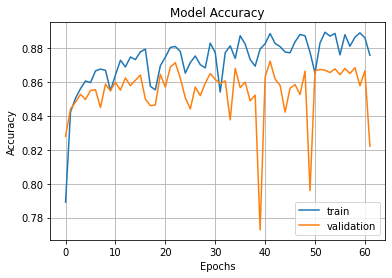

Test accuracy: 0.8640999794006348


In [87]:
### Implement here
def four_hidden_layers_adam_early_stopping(number_of_neurons):
  
  model = GenericFeedForwardNet(n_features, [number_of_neurons]*4, n_classes, 'relu')
  patience = 20
  epochs = 250
  # Declaring Criterion and Optimizer
  loss_fn = nn.CrossEntropyLoss()
  learning_rate = 0.01
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  
  model, train_losses,val_losses,train_accuracies,val_accuracies = train_val(model, epochs, optimizer, loss_fn, early_stopping = True, patience = patience)
  plot_train_val(train_losses,val_losses,train_accuracies,val_accuracies)
  test_acc = test(model)
  print("Test accuracy:",test_acc)  

four_hidden_layers_adam_early_stopping(32)

Run the following commands:

In [ ]:
load_dataset()
# 4 neurons per layer
number_of_neurons = 4
one_hidden_layer_no_activation(number_of_neurons)
two_hidden_layers_sigmoid(number_of_neurons)
two_hidden_layers_relu(number_of_neurons)
two_hidden_layers_relu_adam(number_of_neurons)
two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)
# 32 neurons per layer
number_of_neurons = 32
one_hidden_layer_no_activation(number_of_neurons)
two_hidden_layers_sigmoid(number_of_neurons)
two_hidden_layers_relu(number_of_neurons)
two_hidden_layers_relu_adam(number_of_neurons)
two_hidden_layers_relu_SGD_decreasing_lr(number_of_neurons)
four_hidden_layers_adam(number_of_neurons)
four_hidden_layers_adam_weight_decay(number_of_neurons)
four_hidden_layers_adam_early_stopping(number_of_neurons)


After implementing, running and getting the results Answer the following below:
1. The networks sorted according to their test results from the worst to the best.
2. Give intuitive explanation why we got such order after sorting.
3. Is there any difference between the test and the training accuracy? Why?
4. Don't forget to keep all the function plots in the notebook

Answers:

1. four_hidden_layers_adam_weight_decay

2. לחרטט

## ADD more חירטוטים
3. The test accuracy reflects the model's ability to perform on new, unseen data, while the training accuracy reflects its performance on the data it was trained on.